# 1. Install Dependencies and Setup

In [ ]:
%pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.2.2
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.3
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy          

In [3]:
import tensorflow as tf
import os

In [4]:
# # Avoid OOM errors by setting GPU Memory Consumption Growth
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus: 
#     tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
#tf.config.list_physical_devices('GPU')

# 2. Remove dodgy images

In [6]:
import cv2
import imghdr

C:\Users\Yugesh\AppData\Local\Temp\ipykernel_12500\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir = 'D:/clones/ImageClassification-main/data' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
import os
print(os.getcwd())


c:\Users\Yugesh\Desktop\intern\elite tech\project


In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 305 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

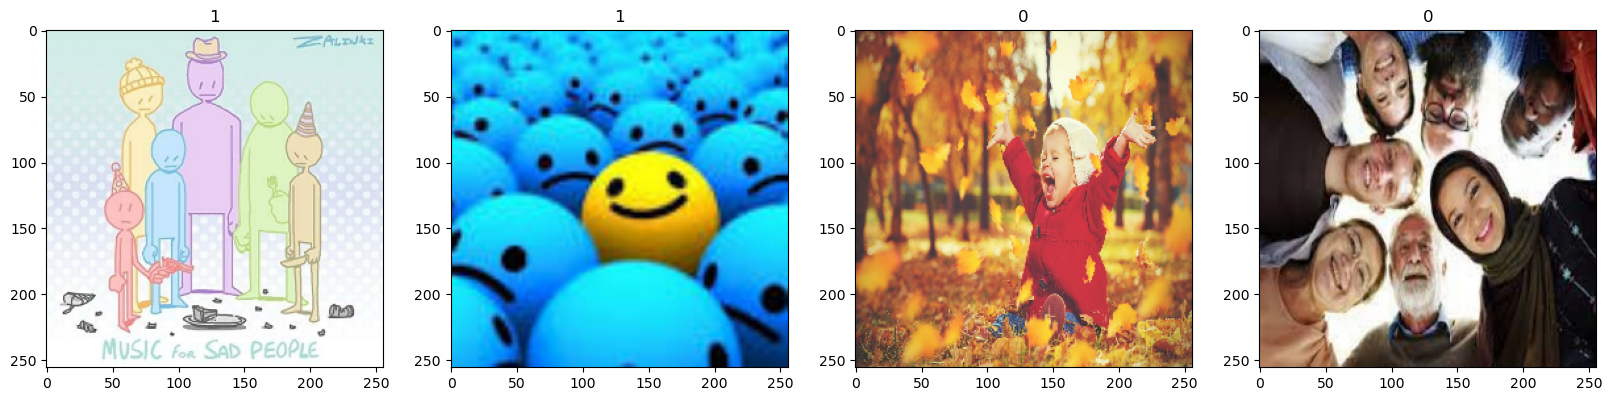

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[0.10211397, 0.0981924 , 0.11780024],
          [0.1058364 , 0.10579044, 0.11377145],
          [0.09388787, 0.09388787, 0.09388787],
          ...,
          [0.09411765, 0.09411765, 0.09411765],
          [0.0710478 , 0.0710478 , 0.0710478 ],
          [0.08648897, 0.08648897, 0.08648897]],
 
         [[0.10211397, 0.0981924 , 0.11780024],
          [0.1058364 , 0.10579044, 0.11377145],
          [0.09388787, 0.09388787, 0.09388787],
          ...,
          [0.09411765, 0.09411765, 0.09411765],
          [0.0710478 , 0.0710478 , 0.0710478 ],
          [0.08648897, 0.08648897, 0.08648897]],
 
         [[0.10211397, 0.0981924 , 0.11780024],
          [0.1058364 , 0.10579044, 0.11377145],
          [0.09388787, 0.09388787, 0.09388787],
          ...,
          [0.09411765, 0.09411765, 0.09411765],
          [0.0710478 , 0.0710478 , 0.0710478 ],
          [0.08648897, 0.08648897, 0.08648897]],
 
         ...,
 
         [[0.14086163, 0.14086163, 0.14086163],
          [0.09976

# 5. Split Data

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
train_size

7

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [21]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Yugesh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [30]:
logdir='logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 429ms/step - accuracy: 0.4921 - loss: 1.0444 - val_accuracy: 0.5625 - val_loss: 0.7024
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 340ms/step - accuracy: 0.5045 - loss: 0.7147 - val_accuracy: 0.5000 - val_loss: 0.6754
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 345ms/step - accuracy: 0.5119 - loss: 0.6640 - val_accuracy: 0.7969 - val_loss: 0.6291
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 400ms/step - accuracy: 0.8078 - loss: 0.5903 - val_accuracy: 0.8594 - val_loss: 0.5072
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 384ms/step - accuracy: 0.7572 - loss: 0.4811 - val_accuracy: 0.7812 - val_loss: 0.3960
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 409ms/step - accuracy: 0.8351 - loss: 0.3925 - val_accuracy: 0.9531 - val_loss: 0.2856
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 386ms/step - accuracy: 0.9006 - loss: 0.3024 - val_accuracy: 0.9062 - val_loss: 0.2551
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 383ms/step - accuracy: 0.9212 - loss: 0.2148 - val_accuracy: 0.9062 - val_loss:

# 8. Plot Performance

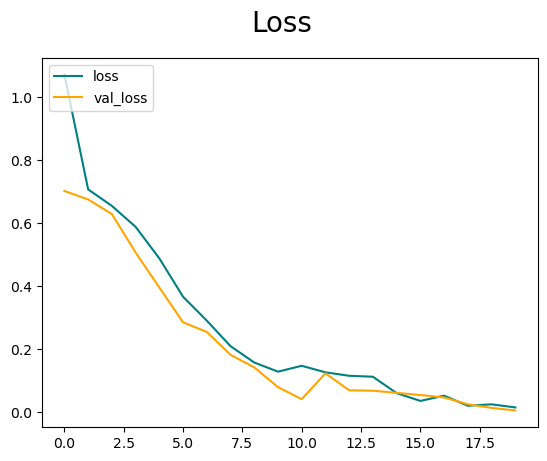

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

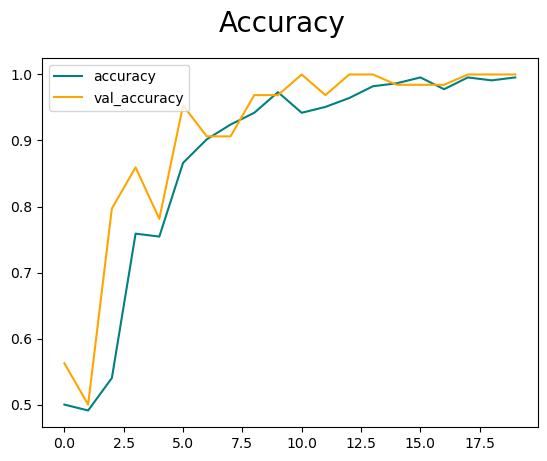

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


In [42]:
print(f"Precision : {pre.result()}\n Recall : {re.result()}\n Binary Accuracy : {acc.result()}")

Precision : 1.0
 Recall : 1.0
 Binary Accuracy : 1.0


# 10. Test

In [39]:
import cv2

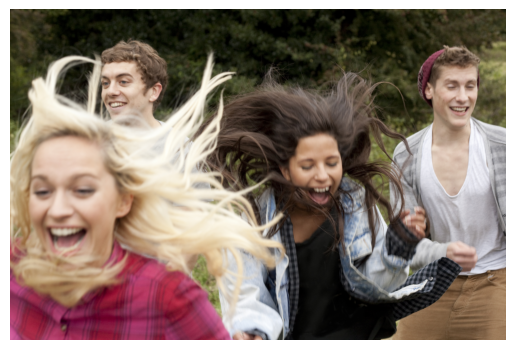

In [43]:
img = cv2.imread('D:/clones/ImageClassification-main/154006829.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

plt.imshow(img_rgb)
plt.axis('off')
plt.show()

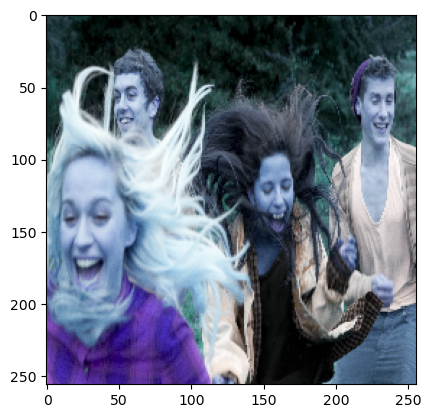

In [44]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


In [46]:
yhat

array([[0.07820599]], dtype=float32)

In [47]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [48]:
from tensorflow.keras.models import load_model

In [49]:
model.save(os.path.join('models','imageclassifier.h5'))

In [50]:
from keras.models import load_model


In [51]:

new_model = load_model('D:/clones/ImageClassification-main/models/imageclassifier.h5', compile=False)

In [52]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


array([[0.09202779]], dtype=float32)